In [79]:
import pandas as pd
import numpy as np

In [80]:
from warnings import filterwarnings
filterwarnings("ignore")

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = sns.load_dataset("iris")

In [83]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
encoder = LabelEncoder()

In [86]:
sns.pairplot(df,hue='species',palette='viridis')

In [87]:
df['species'] = encoder.fit_transform(df['species'])

In [88]:
df = df[df['species'] != 0][["sepal_length","sepal_width","species"]]

In [89]:
df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [90]:
plt.scatter(df['sepal_length'],df['sepal_width'],c=df['species'])

In [91]:
# The above data contains first vercicolor class and then verginica we will shuffle the classes using 
# sample method 
df = df.sample(100)

In [92]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10) #-->For training 
df_val = df.iloc[60:80,:].sample(5)  #--> For testing 
df_test = df.iloc[80:,:].sample(5)  #--> For new query-pt

In [93]:
df_train

,sepal_length,sepal_width,species
75,6.6,3.0,1
148,6.2,3.4,2
106,4.9,2.5,2
57,4.9,2.4,1
123,6.3,2.7,2
60,5.0,2.0,1
149,5.9,3.0,2
58,6.6,2.9,1
101,5.8,2.7,2
130,7.4,2.8,2


In [94]:
df_val

,sepal_length,sepal_width,species
93,5.0,2.3,1
68,6.2,2.2,1
77,6.7,3.0,1
132,6.4,2.8,2
79,5.7,2.6,1


In [95]:
df_test

,sepal_length,sepal_width,species
74,6.4,2.9,1
105,7.6,3.0,2
139,6.9,3.1,2
100,6.3,3.3,2
122,7.7,2.8,2


In [96]:
# Now we will split our data into input_features and output_features
X_test = df_val.iloc[:,:2].values
y_test = df_val.iloc[:,-1].values

# Bagging

In [97]:
# we will train 3 dtrees with different data

In [98]:
# Decision tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_length,sepal_width,species
130,7.4,2.8,2
148,6.2,3.4,2
101,5.8,2.7,2
106,4.9,2.5,2
148,6.2,3.4,2
58,6.6,2.9,1
106,4.9,2.5,2
57,4.9,2.4,1


In [99]:
# Now we are going to train decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [100]:
dt_bag1 = DecisionTreeClassifier()

In [101]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

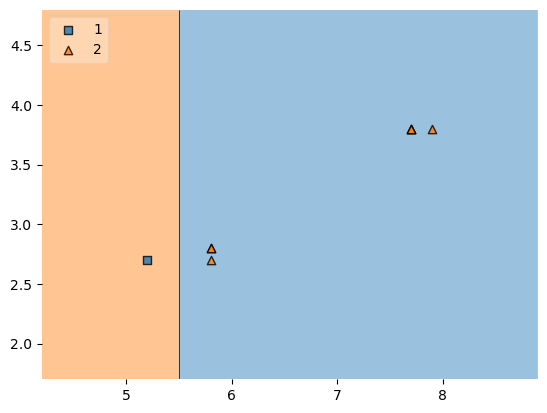

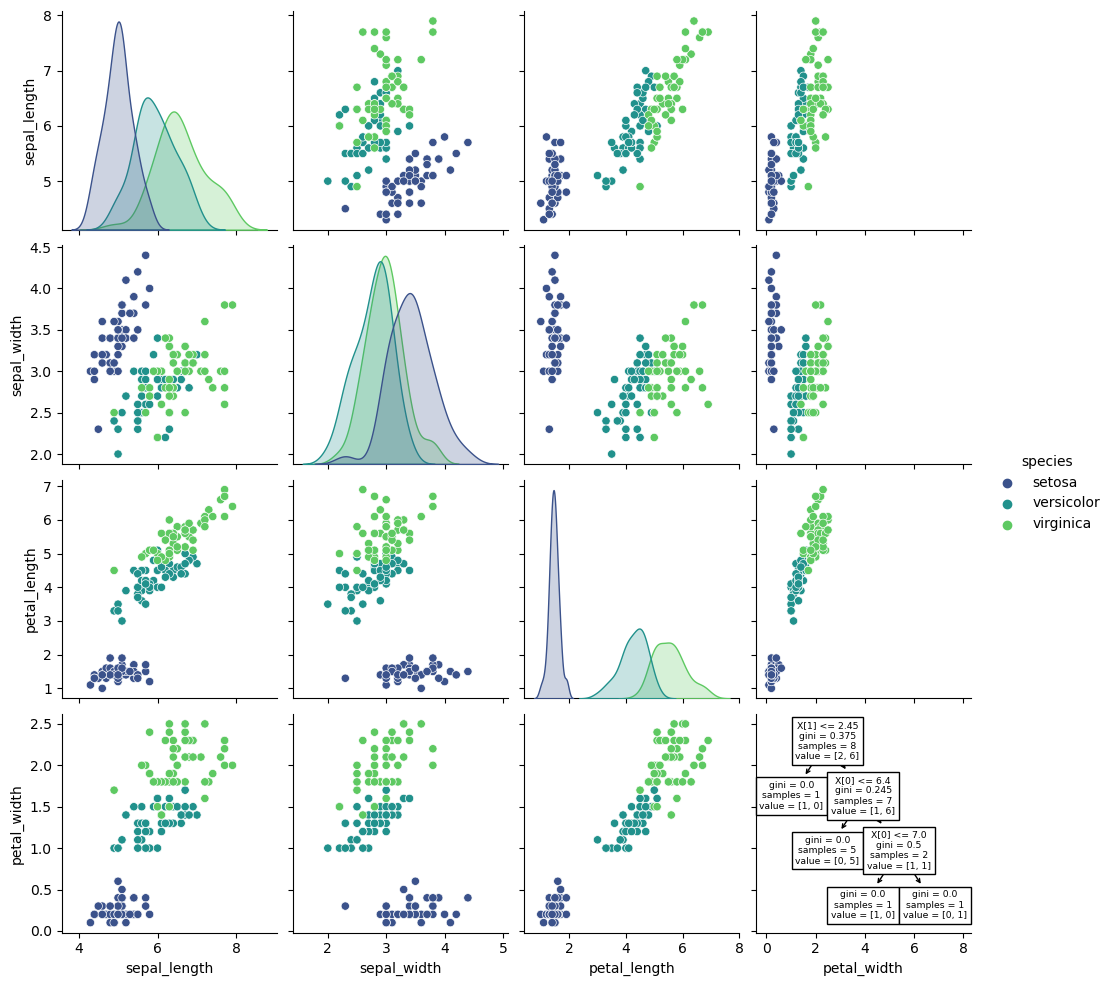

0.6


In [102]:
evaluate(dt_bag1,X,y)

In [103]:
# training of 2nd tree
# Decision tree 2
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_length,sepal_width,species
149,5.9,3.0,2
75,6.6,3.0,1
130,7.4,2.8,2
58,6.6,2.9,1
149,5.9,3.0,2
148,6.2,3.4,2
148,6.2,3.4,2
57,4.9,2.4,1


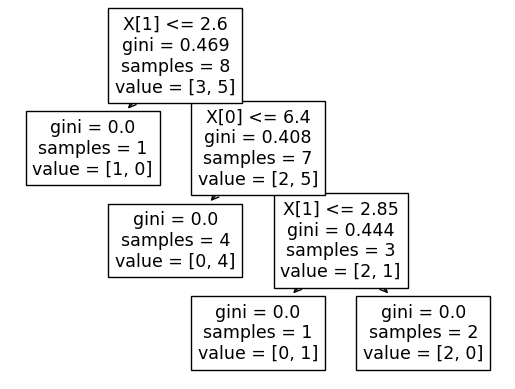

1.0


In [105]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [106]:
# Training of 3rd tree
# Decision tree 3
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_length,sepal_width,species
130,7.4,2.8,2
57,4.9,2.4,1
57,4.9,2.4,1
148,6.2,3.4,2
123,6.3,2.7,2
123,6.3,2.7,2
60,5.0,2.0,1
123,6.3,2.7,2


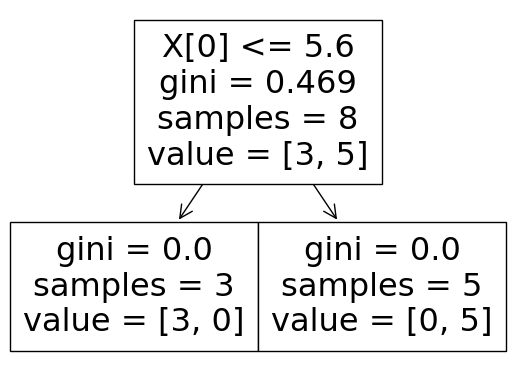

0.4


In [107]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

**Now its time for prediction**

In [111]:
print(X_test)
print("----------------")
print(y_test)

[[5.  2.3]
 [6.2 2.2]
 [6.7 3. ]
 [6.4 2.8]
 [5.7 2.6]]
----------------
[1 1 1 2 1]


In [114]:
print("Predictor 1",dt_bag1.predict(np.array([6.4,2.8]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([6.4,2.8]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([6.4,2.8]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


**We can do column sampling as well if we we are working in high dimension**

***Types of Bagging***

***1.Pasting--> In this type you will do row sampling without replacement***

***2.Random Subspaces--> In this type you will perform column sampling***

***3.Random Patches--> In this type you will perform row+column sampling***

In [121]:
# column sampling
df1 = sns.load_dataset("iris")
df1.sample(2,replace=True,axis=1)

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [123]:
# row + column sampling
df1.sample(8,replace=True,axis=0).sample(2,replace=True,axis=1)

,petal_width,sepal_length
61,1.5,5.9
111,1.9,6.4
95,1.2,5.7
89,1.3,5.5
93,1.0,5.0
97,1.3,6.2
62,1.0,6.0
51,1.5,6.4
